# Capstone3 Loan Default Logistic Regression 

In thi scase study we introduce
_x
-x
-x

Here is the list of the main concepts coverec in this notebook

-y
-y


## Libraries that will be used

In [1]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#

## Data Wrangling


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/lendingdata/XYZCorp_LendingData.txt", delimiter="\t",nrows=200000)
df.head()


/tmp/ipykernel_20/3332261811.py:2: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/lendingdata/XYZCorp_LendingData.txt", delimiter="\t",nrows=200000)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
# drop non-important features
cols=["loan_amnt","funded_amnt","id","member_id","emp_title","issue_d","desc","purpose","title","zip_code","earliest_cr_line","mths_since_last_delinq",
      "mths_since_last_record","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","mths_since_last_major_derog",
      "verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m",
      "mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl",
      "inq_last_12m","annual_inc_joint","dti_joint","addr_state"]
df=df.drop(columns=cols)
df.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,policy_code,application_type,default_ind
0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,5831.78,5000.00,861.07,0.00,0.00,0.00,0.0,1.0,INDIVIDUAL,0
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,1008.71,456.46,435.17,0.00,117.08,1.11,0.0,1.0,INDIVIDUAL,1
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,3003.65,2400.00,603.65,0.00,0.00,0.00,0.0,1.0,INDIVIDUAL,0
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,0.0,1.0,INDIVIDUAL,0
4,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,0.0,1.0,INDIVIDUAL,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt_inv,200000.0,13666.634343,8069.181782,0.00,7500.000000,12000.000000,19000.000000,3.500000e+04
int_rate,200000.0,13.933748,4.393508,5.42,10.990000,13.680000,16.890000,2.606000e+01
installment,200000.0,423.187464,240.494399,15.69,248.677500,375.490000,555.990000,1.408130e+03
annual_inc,200000.0,72048.307350,55314.369329,4000.00,45000.000000,62000.000000,86000.000000,7.141778e+06
dti,200000.0,16.467769,7.622452,0.00,10.750000,16.180000,21.940000,3.499000e+01
delinq_2yrs,200000.0,0.231115,0.683245,0.00,0.000000,0.000000,0.000000,2.900000e+01
inq_last_6mths,200000.0,0.816475,1.044265,0.00,0.000000,0.000000,1.000000,8.000000e+00
open_acc,200000.0,10.742480,4.638348,0.00,7.000000,10.000000,13.000000,6.200000e+01
pub_rec,200000.0,0.104930,0.399575,0.00,0.000000,0.000000,0.000000,5.400000e+01
revol_bal,200000.0,15977.158900,19400.893933,0.00,6556.000000,11931.500000,20304.000000,2.568995e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   funded_amnt_inv             200000 non-null  float64
 1   term                        200000 non-null  object 
 2   int_rate                    200000 non-null  float64
 3   installment                 200000 non-null  float64
 4   grade                       200000 non-null  object 
 5   sub_grade                   200000 non-null  object 
 6   emp_length                  192013 non-null  object 
 7   home_ownership              200000 non-null  object 
 8   annual_inc                  200000 non-null  float64
 9   verification_status         200000 non-null  object 
 10  pymnt_plan                  200000 non-null  object 
 11  dti                         200000 non-null  float64
 12  delinq_2yrs                 200000 non-null  float64
 13  inq_last_6mths

In [6]:
# missing data
df.isnull().sum()

funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    7987
home_ownership                   0
annual_inc                       0
verification_status              0
pymnt_plan                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                     143
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_

# EDA

## Categorical Features

In [7]:
print(df.select_dtypes("object").head(5).T)
df.select_dtypes("object").value_counts()

                              0                1             2  \
term                  36 months        60 months     36 months   
grade                         B                C             C   
sub_grade                    B2               C4            C5   
emp_length            10+ years         < 1 year     10+ years   
home_ownership             RENT             RENT          RENT   
verification_status    Verified  Source Verified  Not Verified   
pymnt_plan                    n                n             n   
initial_list_status           f                f             f   
application_type     INDIVIDUAL       INDIVIDUAL    INDIVIDUAL   

                                   3                4  
term                       36 months        60 months  
grade                              C                B  
sub_grade                         C1               B5  
emp_length                 10+ years           1 year  
home_ownership                  RENT             RENT  
ver

term        grade  sub_grade  emp_length  home_ownership  verification_status  pymnt_plan  initial_list_status  application_type
 36 months  B      B2         10+ years   MORTGAGE        Verified             n           f                    INDIVIDUAL          858
                   B3         10+ years   MORTGAGE        Verified             n           f                    INDIVIDUAL          858
                   B4         10+ years   MORTGAGE        Verified             n           f                    INDIVIDUAL          811
                   B2         10+ years   MORTGAGE        Not Verified         n           f                    INDIVIDUAL          717
                   B3         10+ years   MORTGAGE        Not Verified         n           f                    INDIVIDUAL          705
                                                                                                                                   ... 
            E      E3         2 years     OWN          

In [8]:
df.select_dtypes("object").value_counts()

term        grade  sub_grade  emp_length  home_ownership  verification_status  pymnt_plan  initial_list_status  application_type
 36 months  B      B2         10+ years   MORTGAGE        Verified             n           f                    INDIVIDUAL          858
                   B3         10+ years   MORTGAGE        Verified             n           f                    INDIVIDUAL          858
                   B4         10+ years   MORTGAGE        Verified             n           f                    INDIVIDUAL          811
                   B2         10+ years   MORTGAGE        Not Verified         n           f                    INDIVIDUAL          717
                   B3         10+ years   MORTGAGE        Not Verified         n           f                    INDIVIDUAL          705
                                                                                                                                   ... 
            E      E3         2 years     OWN          

## Numeric Features

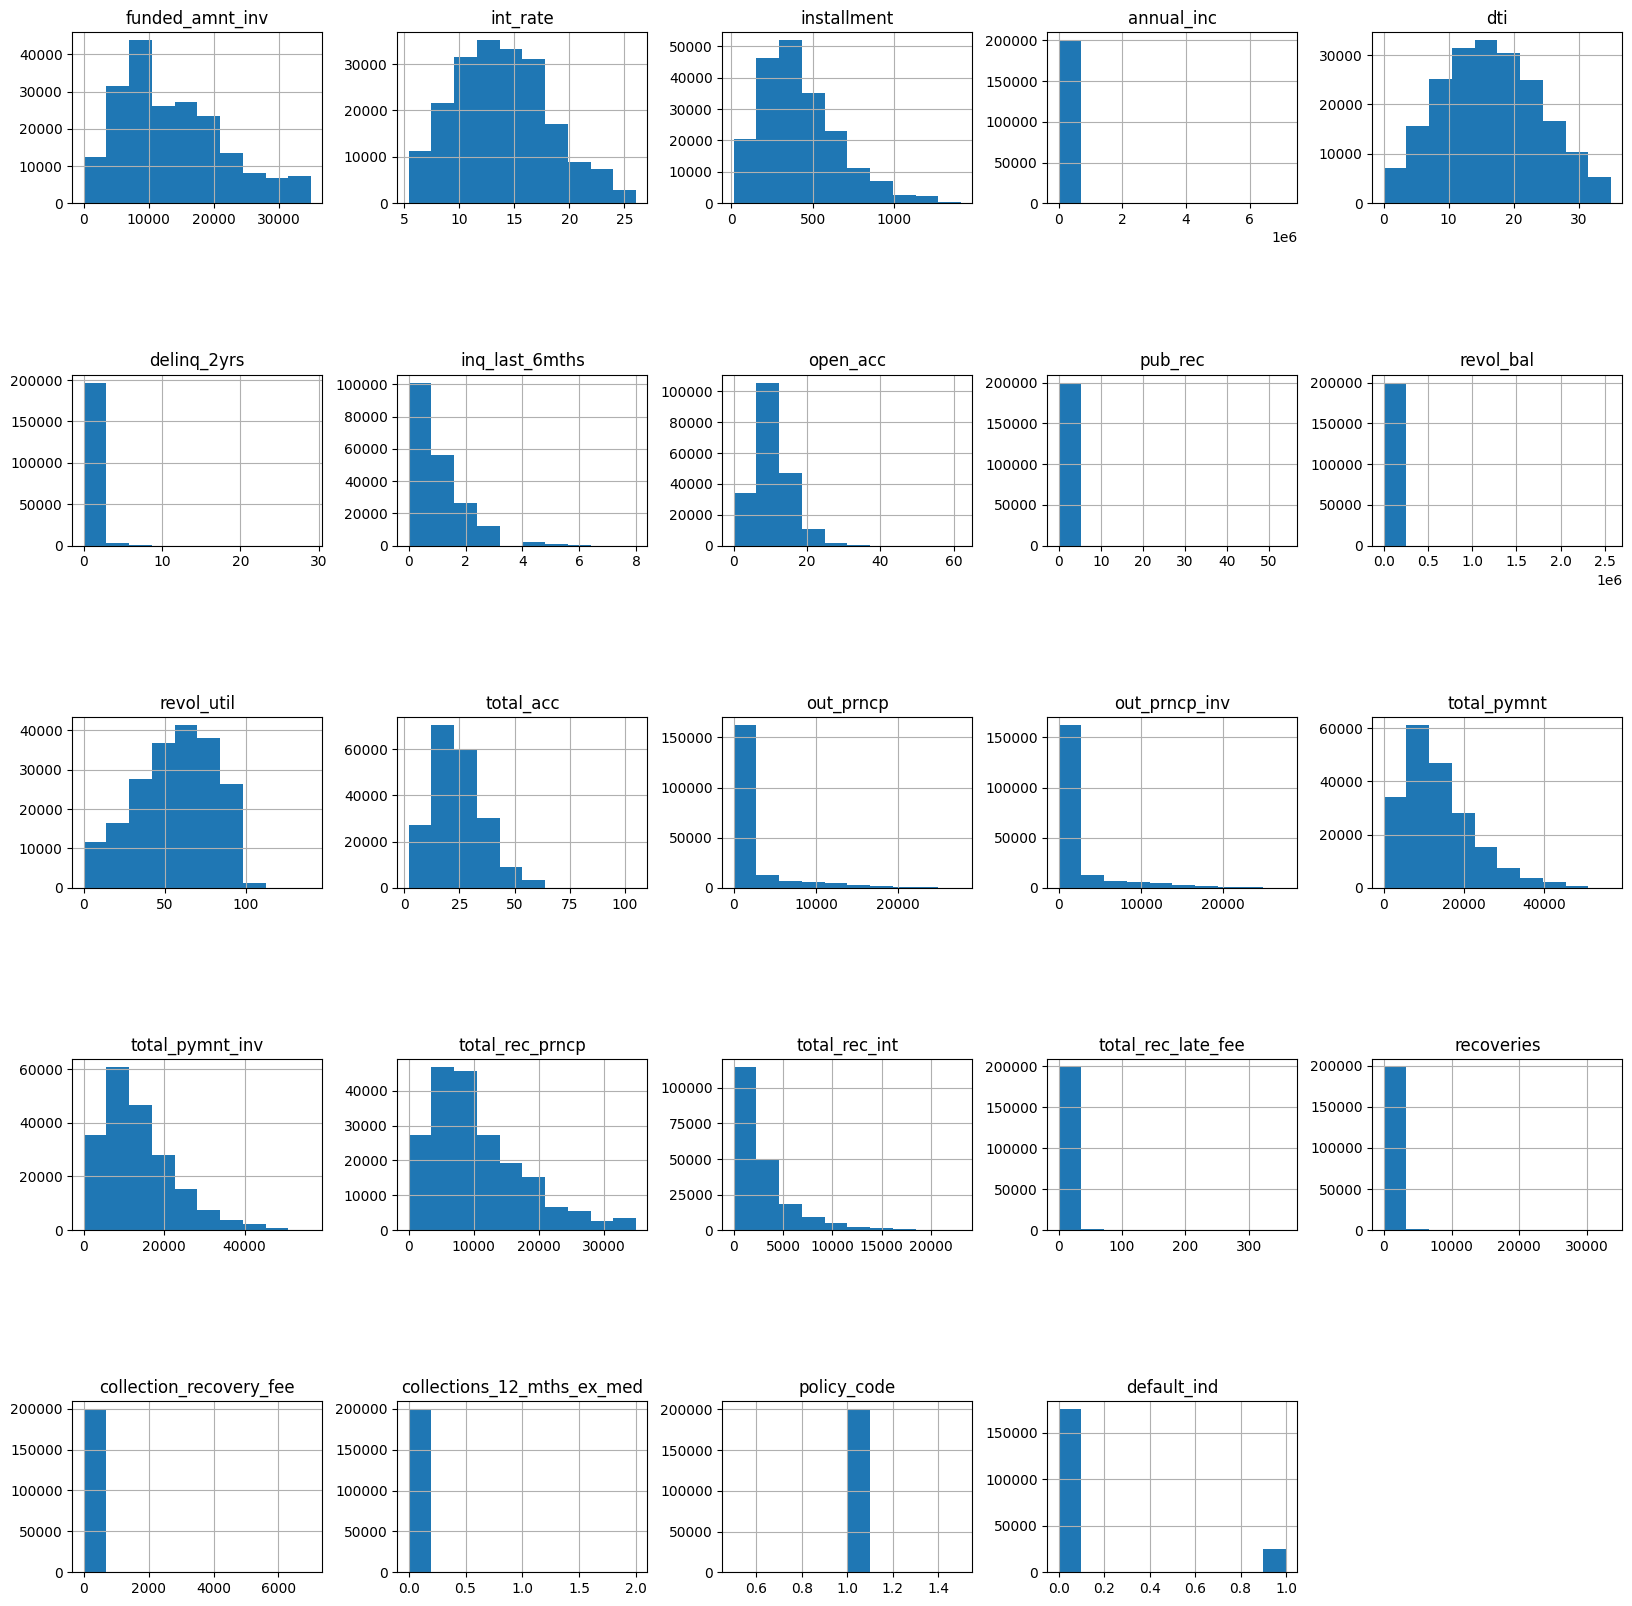

In [9]:
df.hist(figsize=(20,20))
plt.subplots_adjust(hspace=1);

In [10]:
#define a function to create scatterplotf of default against numeric feature

def scatterplots ( columns, ncol=None, figsize=(15,15)):
    if ncol is None:
        ncol=len(columns)
    nrow=int(np.ceil(len(columns)/ncol))
    fig,axes=plt.subplots(nrow,ncol,figsize=figsize,squeeze=False)
    fig.subplots_adjust(wspace=0.5,hspace=0.6)
    for i,col in enumerate(columns):
        ax=axes.flatten()[i]
        ax.scatter(x=col,y='default_ind',data=df,alpha=0.5)
        ax.set(xlabel=col, ylabel='default_ind')
    nsubplots=nrow*ncol
    for empty in range(i*1,nsubplots):
        axes.flatten()[empty].set_visible(False)

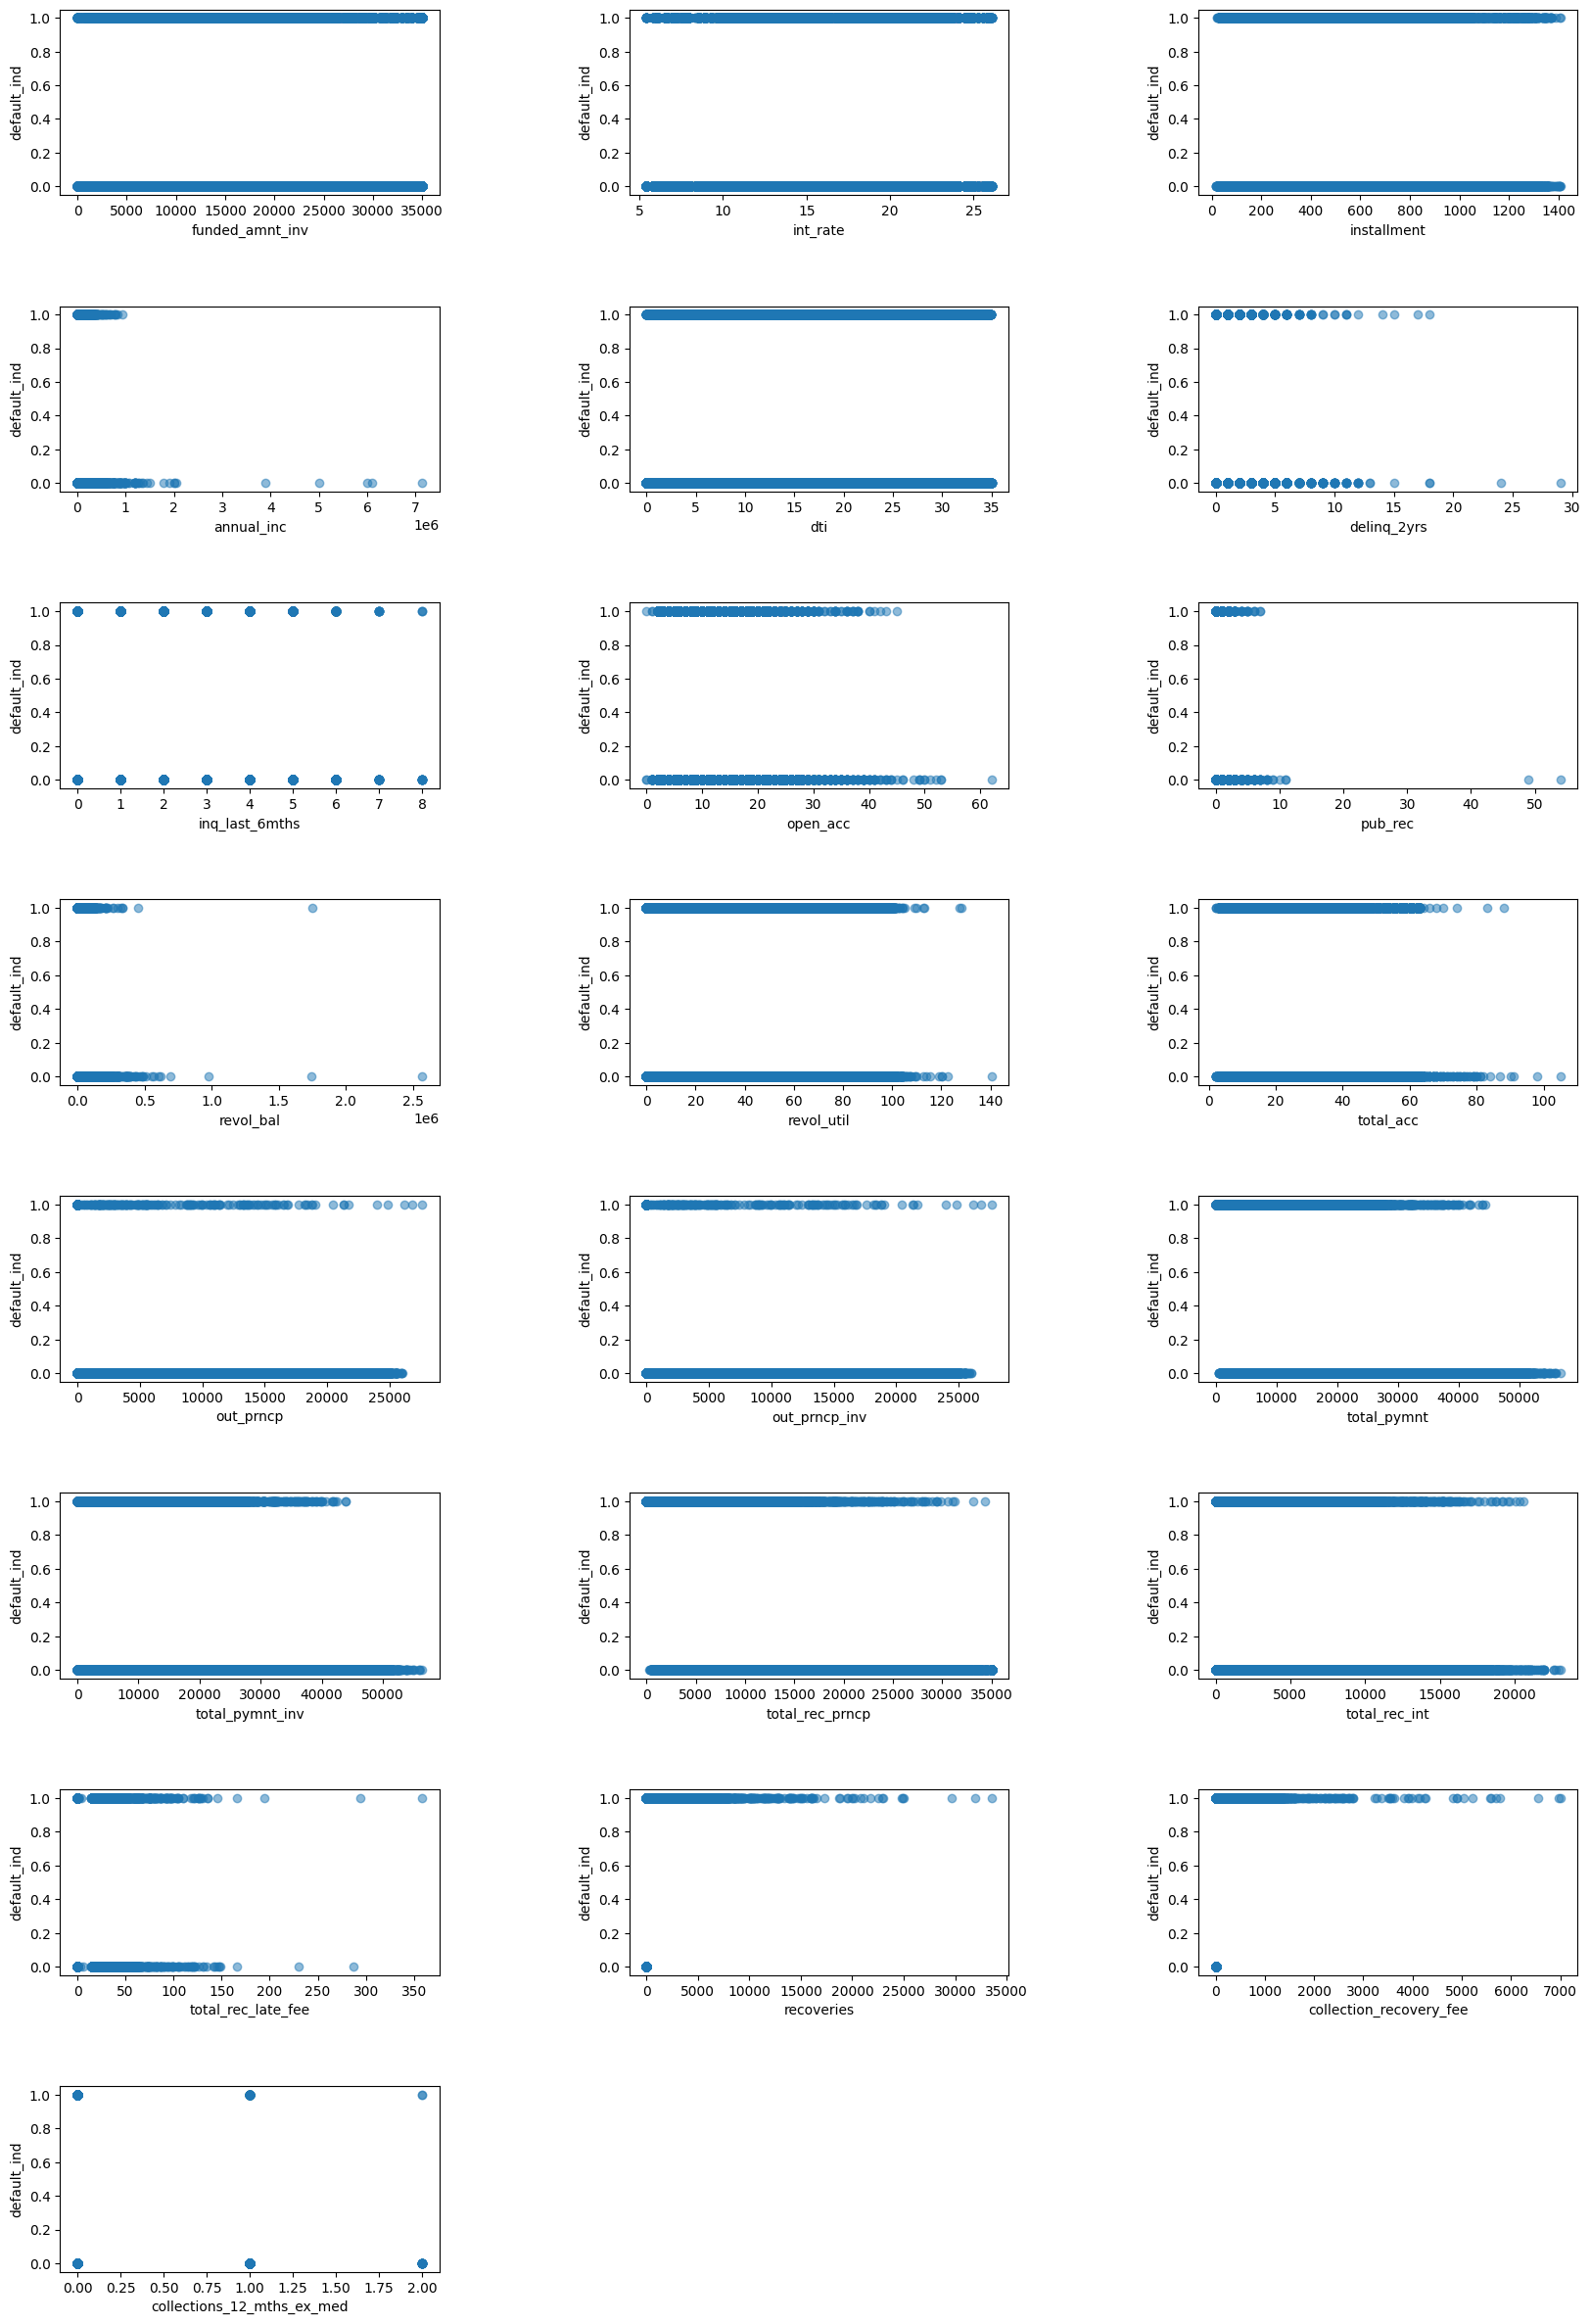

In [11]:
# select numeric features for scatterplots and call scatterplots
features= df.select_dtypes(include=np.number).columns.tolist()
features.remove("default_ind")
scatterplots(features,ncol=3,figsize=(20,30))

## Categorical Features

In [12]:
df.select_dtypes("object").head(5).T

,0,1,2,3,4
term,36 months,60 months,36 months,36 months,60 months
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5
emp_length,10+ years,< 1 year,10+ years,10+ years,1 year
home_ownership,RENT,RENT,RENT,RENT,RENT
verification_status,Verified,Source Verified,Not Verified,Source Verified,Source Verified
pymnt_plan,n,n,n,n,n
initial_list_status,f,f,f,f,f
application_type,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL,INDIVIDUAL


## Propotion of classes

In [13]:
class_counts=df.default_ind.value_counts()
print("Loan default counts: \n",class_counts)

class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
class_percentages
print("\nLoan default percentages: \n",class_percentages)

Loan default counts: 
 default_ind
0    175258
1     24742
Name: count, dtype: int64

Loan default percentages: 
 0    87.629
1    12.371
dtype: float64
